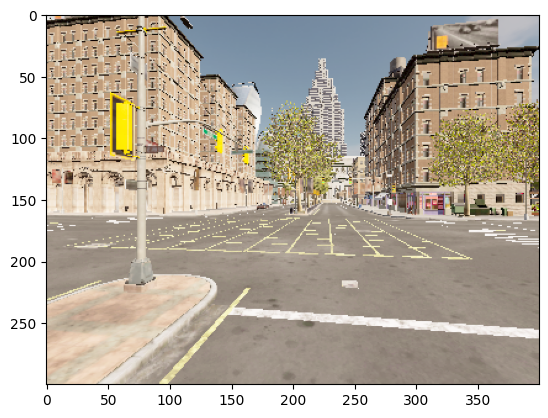

In [25]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

img = cv2.imread('test_images/test_image.png')
img2 = cv2.imread('test_images/test_image_fov_45_right.png')
img3 = cv2.imread('test_images/test_image9  .png')
show_image(img)

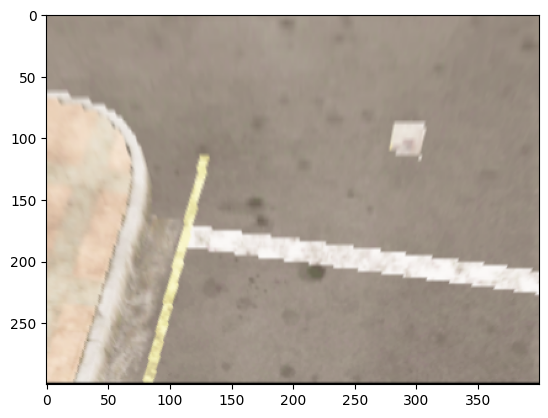

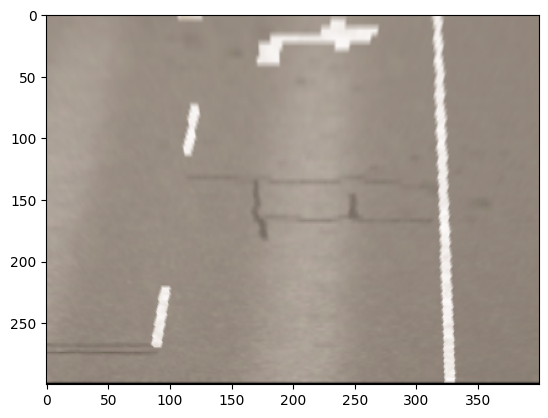

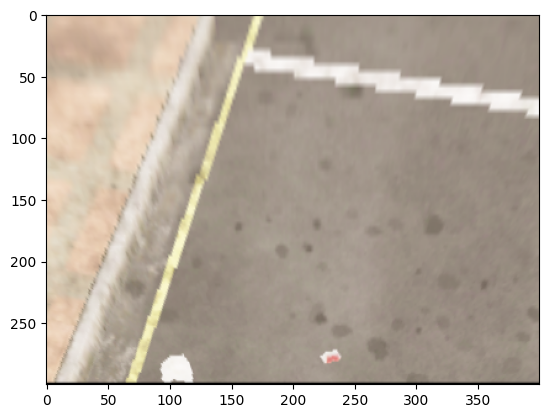

In [16]:
# points
# [10, 300] - [150, 154] | [330, 300] - [180, 154]
width, height = 400, 300

src = np.float32([[0, height-1], [width-1, height-1], [0, 0], [width-1, 0]])
# dst = np.float32([[10, height], [330, height], [150, 154], [180, 154]])
# dst = np.float32([[18, height], [330, height], [152, 160], [175, 160]])
# dst = np.float32([[14, height], [330, height], [110, 200], [220, 200]])

bottom, up = 20, 120
dst = np.float32([[bottom, height], [width-bottom, height], [up, 200], [width-up, 200]])

# dst = np.float32([[10, height], [330, height], [150, 158], [180, 158]])
# dst = np.float32([[70, height], [278, height], [156, 158], [170, 158]]) # exact lines (maybe)
# dst = np.float32([[0, height], [width, height], [150, 154], [180, 154]])

# transform = cv2.getPerspectiveTransform(dst, src)
transform = cv2.getPerspectiveTransform(dst, src)

new_img = cv2.warpPerspective(img, transform, (width, height))
show_image(new_img)

'''
new_img2 = cv2.warpPerspective(img2, transform, (width, height))
show_image(new_img2)

new_img3 = cv2.warpPerspective(img3, transform, (width, height))
show_image(new_img3)
'''

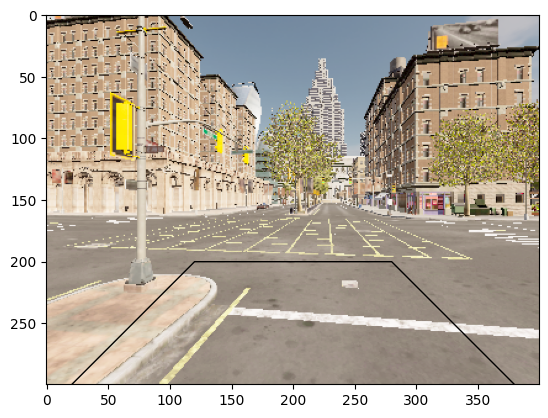

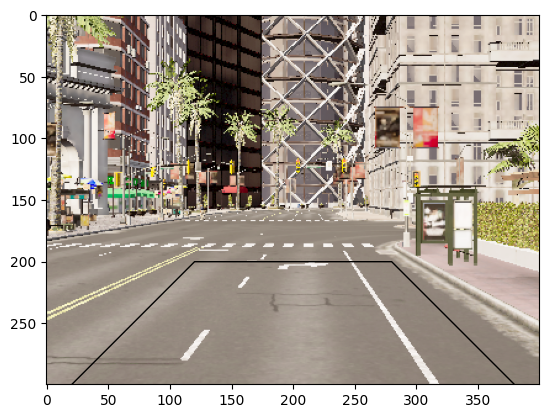

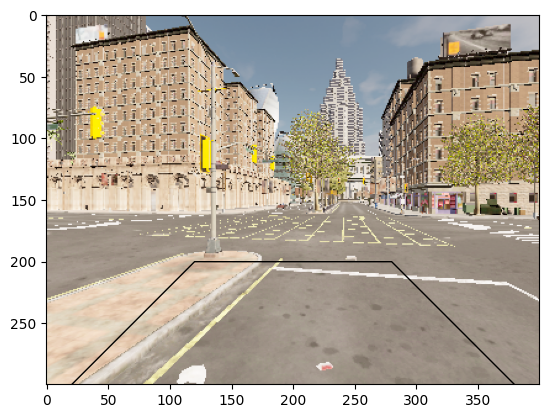

In [28]:
def show_image_and_trapezoid(img, points):
    fig = plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax = plt.gca()

    points = [points[0], points[1], points[3], points[2]]
    ax.add_patch(patches.Polygon(xy=points, fill=False))

    plt.show()

show_image_and_trapezoid(img, dst)
show_image_and_trapezoid(img2, dst)
show_image_and_trapezoid(img3, dst)